# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd, datetime
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    # Create endpoint URL with each city
    # city_url = f"{url}&appid={weather_api_key}&q=units=metric"
    city_url = f"{url}q={city}&units={'metric'}&appid={weather_api_key}"
    # print(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # print(json.dumps(city_weather, indent=4, sort_keys=True))

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp =city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | chul'man
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | mead valley
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | whitehorse
Processing Record 7 of Set 1 | mount isa
Processing Record 8 of Set 1 | northport
Processing Record 9 of Set 1 | vernon
Processing Record 10 of Set 1 | sol'-iletsk
Processing Record 11 of Set 1 | clinton
Processing Record 12 of Set 1 | sao joao da barra
Processing Record 13 of Set 1 | constantia
Processing Record 14 of Set 1 | al bawiti
Processing Record 15 of Set 1 | jiazi
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | keflavik
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | taiohae
City not found. Skipping...
Processing Record 22 of Set 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(data=city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,15.67,76,41,9.45,SH,1707070503
1,chul'man,56.8479,124.9104,-39.33,100,77,0.47,RU,1707070504
2,adamstown,-25.0660,-130.1015,24.85,79,99,3.46,PN,1707070504
3,mead valley,33.8334,-117.2962,14.05,72,20,3.60,US,1707070505
4,tiksi,71.6872,128.8694,-33.61,100,95,0.39,RU,1707070505


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,15.67,76,41,9.45,SH,1707070503
1,chul'man,56.8479,124.9104,-39.33,100,77,0.47,RU,1707070504
2,adamstown,-25.0660,-130.1015,24.85,79,99,3.46,PN,1707070504
3,mead valley,33.8334,-117.2962,14.05,72,20,3.60,US,1707070505
4,tiksi,71.6872,128.8694,-33.61,100,95,0.39,RU,1707070505


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

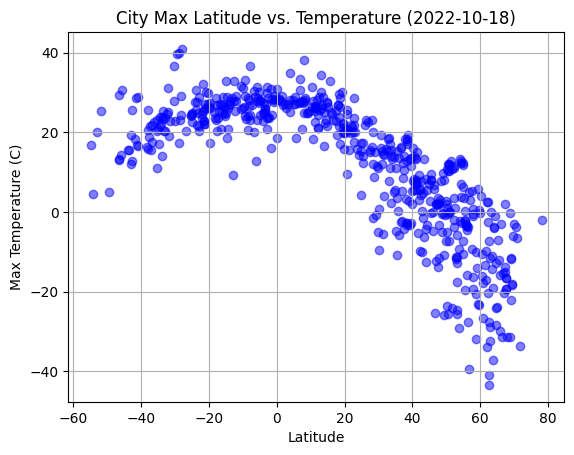

In [8]:
# Build scatter plot for latitude vs. temperature
latitude=city_data_df['Lat']
temp= city_data_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(latitude,temp,marker='o',facecolor='blue',alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

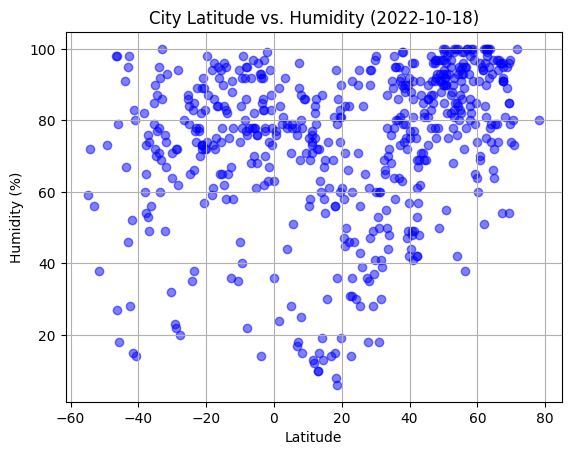

In [9]:
# Build the scatter plots for latitude vs. humidity
latitude=city_data_df['Lat']
humidity= city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(latitude,humidity,marker='o',facecolor='blue',alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

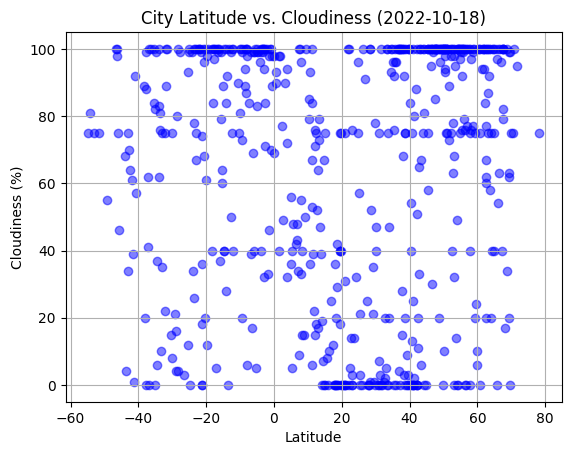

In [10]:
# Build the scatter plots for latitude vs. cloudiness
latitude=city_data_df['Lat']
cloudiness= city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(latitude,cloudiness,marker='o',facecolor='blue',alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

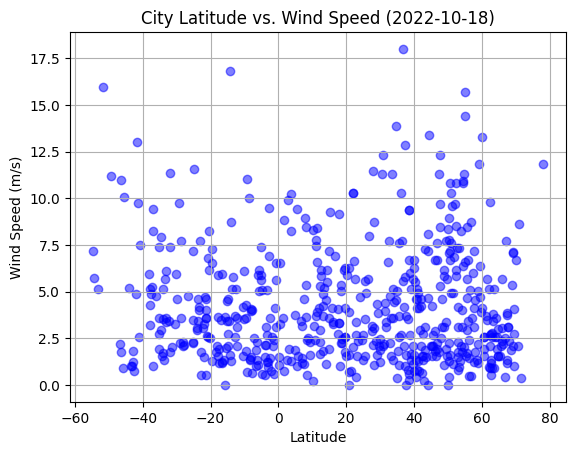

In [11]:
# Build the scatter plots for latitude vs. wind speed
latitude=city_data_df['Lat']
wind= city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.scatter(latitude,wind,marker='o',facecolor='blue',alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [48]:
# Define a function to create Linear Regression plots
def hemi_regression(weather_condition,hemisphere_df):
    hemi_lat=hemisphere_df['Lat']
    condition=hemisphere_df[weather_condition]
    res=linregress(hemi_lat,condition)
    y_string = 'y=' + str(round(res.slope,2)) + 'x +' + str(round(res.intercept,2))
    rvalue_string=res.rvalue
    
    plt.plot(hemi_lat,condition,'o')
    plt.plot(hemi_lat, res.intercept + res.slope*hemi_lat, 'r', label='fitted line')
    plt.xlabel('Latitude')
    plt.ylabel(weather_condition)
    plt.annotate(y_string,(6,10),xycoords='figure pixels',fontsize = 12, color = 'red')
    print(f'r-value is:{rvalue_string}')
    plt.show()
    

In [49]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df['Lat']>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,chul'man,56.8479,124.9104,-39.33,100,77,0.47,RU,1707070504
3,mead valley,33.8334,-117.2962,14.05,72,20,3.60,US,1707070505
4,tiksi,71.6872,128.8694,-33.61,100,95,0.39,RU,1707070505
5,whitehorse,60.7161,-135.0538,-26.57,69,75,1.54,CA,1707070505
7,northport,33.2290,-87.5772,7.90,78,100,3.60,US,1707070506


In [50]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df['Lat']< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,15.67,76,41,9.45,SH,1707070503
2,adamstown,-25.0660,-130.1015,24.85,79,99,3.46,PN,1707070504
6,mount isa,-20.7333,139.5000,25.87,89,96,2.57,AU,1707070505
11,sao joao da barra,-21.6403,-41.0511,32.05,82,99,4.70,BR,1707070507
15,ushuaia,-54.8000,-68.3000,16.81,59,75,7.20,AR,1707070281


###  Temperature vs. Latitude Linear Regression Plot

r-value is:-0.8368553332233539


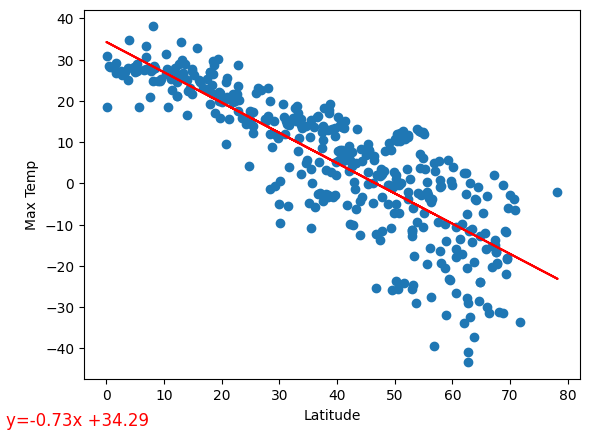

In [51]:
# Linear regression on Northern Hemisphere
hemi_regression('Max Temp',northern_hemi_df)

r-value is:0.4475012245910845


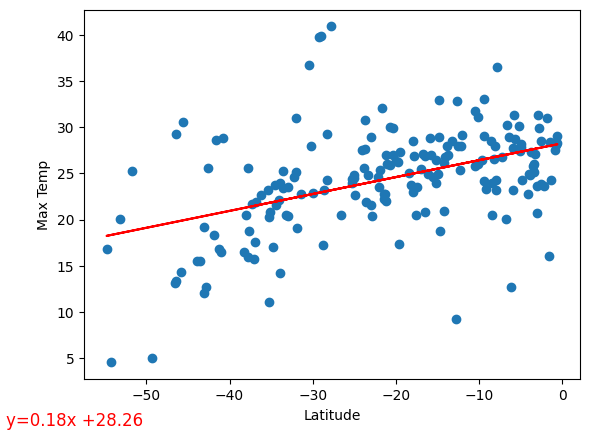

In [52]:
# Linear regression on Southern Hemisphere
hemi_regression('Max Temp',southern_hemi_df)

**Discussion about the linear relationship:** 

The Northern Hemisphere has a strong negative correlation (-0.837) because it's moving away from the equator and the latitude is increasing, which is corresponds to the decrease in temperature. The Southern Hemisphere has a moderate positive correlation (0.448) as it is moving away from the north pole. The increasing latitude corresponds to the increasing temperatures. 

### Humidity vs. Latitude Linear Regression Plot

r-value is:0.4764656489260997


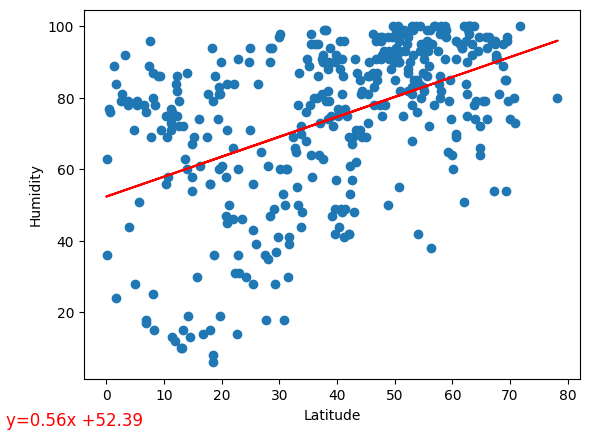

In [53]:
# Northern Hemisphere
hemi_regression('Humidity',northern_hemi_df)

r-value is:0.2540747139126273


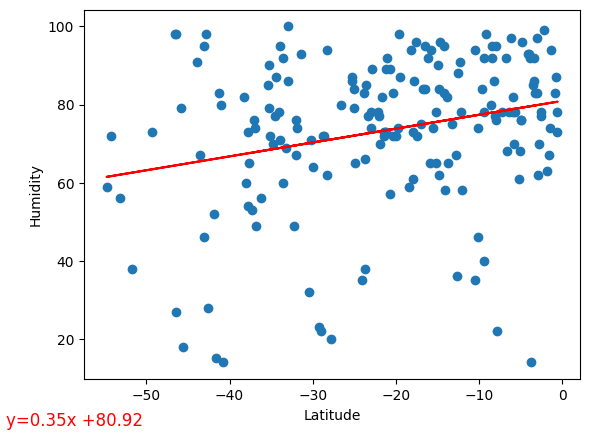

In [54]:
# Southern Hemisphere
hemi_regression('Humidity',southern_hemi_df)

**Discussion about the linear relationship:** 
The Northern Hemisphere is a moderate positive correlation with a value of 0.476. As it is moving away from the equator and increasing latitude it corresponds in increasing the humidity levels. Whereas the Southern Hemisphere has a weaker positive correlation with a value of 0.254. It also has an increasing positive humidity level, but it is not as strong as the Northern Hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

r-value is:0.3200246353234957


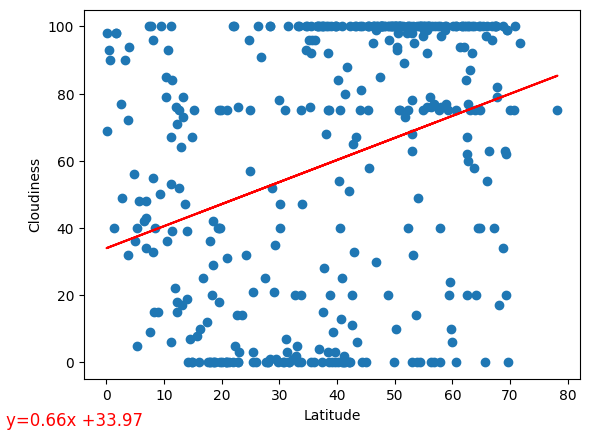

In [55]:
# Northern Hemisphere
hemi_regression('Cloudiness',northern_hemi_df)

r-value is:0.2166850572178455


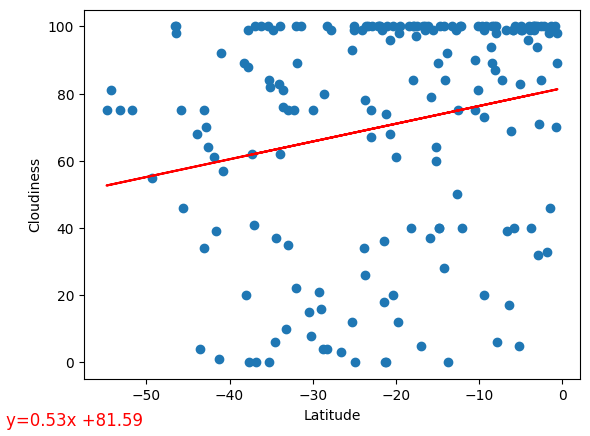

In [56]:
# Southern Hemisphere
hemi_regression('Cloudiness',southern_hemi_df)

**Discussion about the linear relationship:** 
The Northern and Southern Hemispheres have a positive correlation. The Northern is stronger than the Southern with a 0.320 vs. 0.217 R-value. Both hemispheres indicate a slight increase in cloudiness with increasing latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

r-value is:0.0056550011847722095


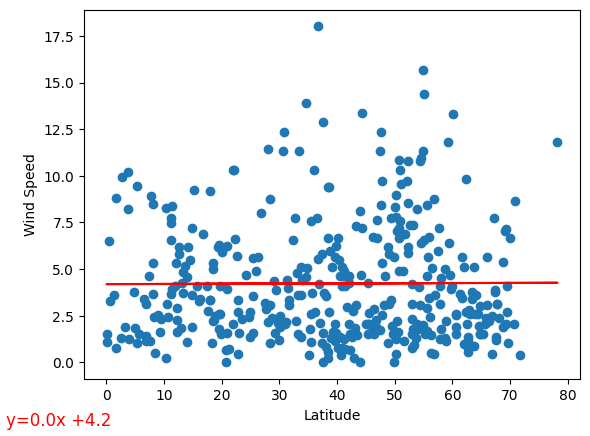

In [57]:
# Northern Hemisphere
hemi_regression('Wind Speed',northern_hemi_df)

r-value is:-0.2464509040576525


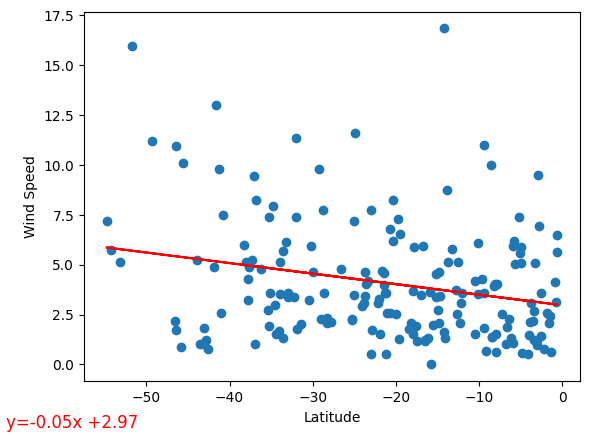

In [58]:
# Southern Hemisphere
hemi_regression('Wind Speed',southern_hemi_df)

**Discussion about the linear relationship:** 
The Northern Hemisphere has a weak positive correlation with almost no relationship between wind speed and latitude. While the Southern Hemisphere has a weak negative correlation, which suggests a slight tendency for wind speed to decrease with an increasing latitude. However, the relationship is not strong. 